In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, color, filters, feature, measure
import pyclesperanto_prototype as cle
from scipy import ndimage as ndi
from scipy import stats
import napari
import pandas as pd

In [2]:
import os
import re

In [3]:
img_path = "./data_04_04/images/"
msk_path = "./data_04_04/masks/"

img_list = os.listdir(img_path)
msk_list = os.listdir(msk_path)

In [4]:
def sort_by_number(list_name):
    list_name.sort(key=lambda f: int(re.sub('\D', '', f)))
    return list_name

In [5]:
img_list = sort_by_number(img_list)
msk_list = sort_by_number(msk_list)

In [6]:
assert len(img_list) == len(msk_list)
print("Number of images: ", len(img_list))
print("Number of masks: ", len(msk_list))

Number of images:  99
Number of masks:  99


In [7]:
# Check that position in file name is corresponding to it's position in the list
def pos_check(file_list, file_path):
    file_path = sort_by_number(os.listdir(file_path))
    for actual_name, expected_name in zip(file_list, file_path):
        if actual_name.split(" ")[1][1:3] == expected_name.split(" ")[1][1:3]:
            continue
        else:
            print("Missing name: ", actual_name)
            break
    else:
        print("All good!")

In [8]:
pos_check(img_list, img_path)

All good!


In [9]:
pos_check(msk_list, msk_path)

All good!


In [ ]:
import dask.array as da
from dask.diagnostics import ProgressBar

In [10]:
images = np.array([io.imread(img_path + file_name, as_gray=True) for file_name in img_list])
masks = np.array([io.imread(msk_path + file_name, as_gray=True) for file_name in msk_list])

In [27]:
# Plot images and masks
def plot_images(images, masks, n=5, size=(6, 10)):
    # Use random images and masks
    idx = np.random.randint(0, images.shape[0], n)
    images = images[idx]
    masks = masks[idx]
    fig, ax = plt.subplots(n, 2, figsize=size)
    # Space between subplots
    fig.subplots_adjust(hspace=0.5)
    for i in range(n):
        ax[i, 0].set_title(f"Image {i}")
        ax[i, 0].imshow(images[i], cmap="gray")
        ax[i, 1].set_title(f"Mask {i}")
        ax[i, 1].imshow(masks[i], cmap="gray")
    plt.show()

In [28]:
# Plot labels using color.label2rgb
def plot_labels(labels, images, n=5, size=(6, 10)):
    idx = np.random.randint(0, images.shape[0], n)
    images = images[idx]
    labels = labels[idx]
    fig, ax = plt.subplots(n, 2, figsize=size)
    fig.subplots_adjust(hspace=0.5)
    for i in range(n):
        ax[i, 0].set_title(f"Image {i}")
        ax[i, 0].imshow(images[i], cmap="gray")
        ax[i, 1].set_title(f"Labels {i}")
        ax[i, 1].imshow(color.label2rgb(labels[i], image=images[i], bg_label=0))
    plt.show()

### Basic statistics

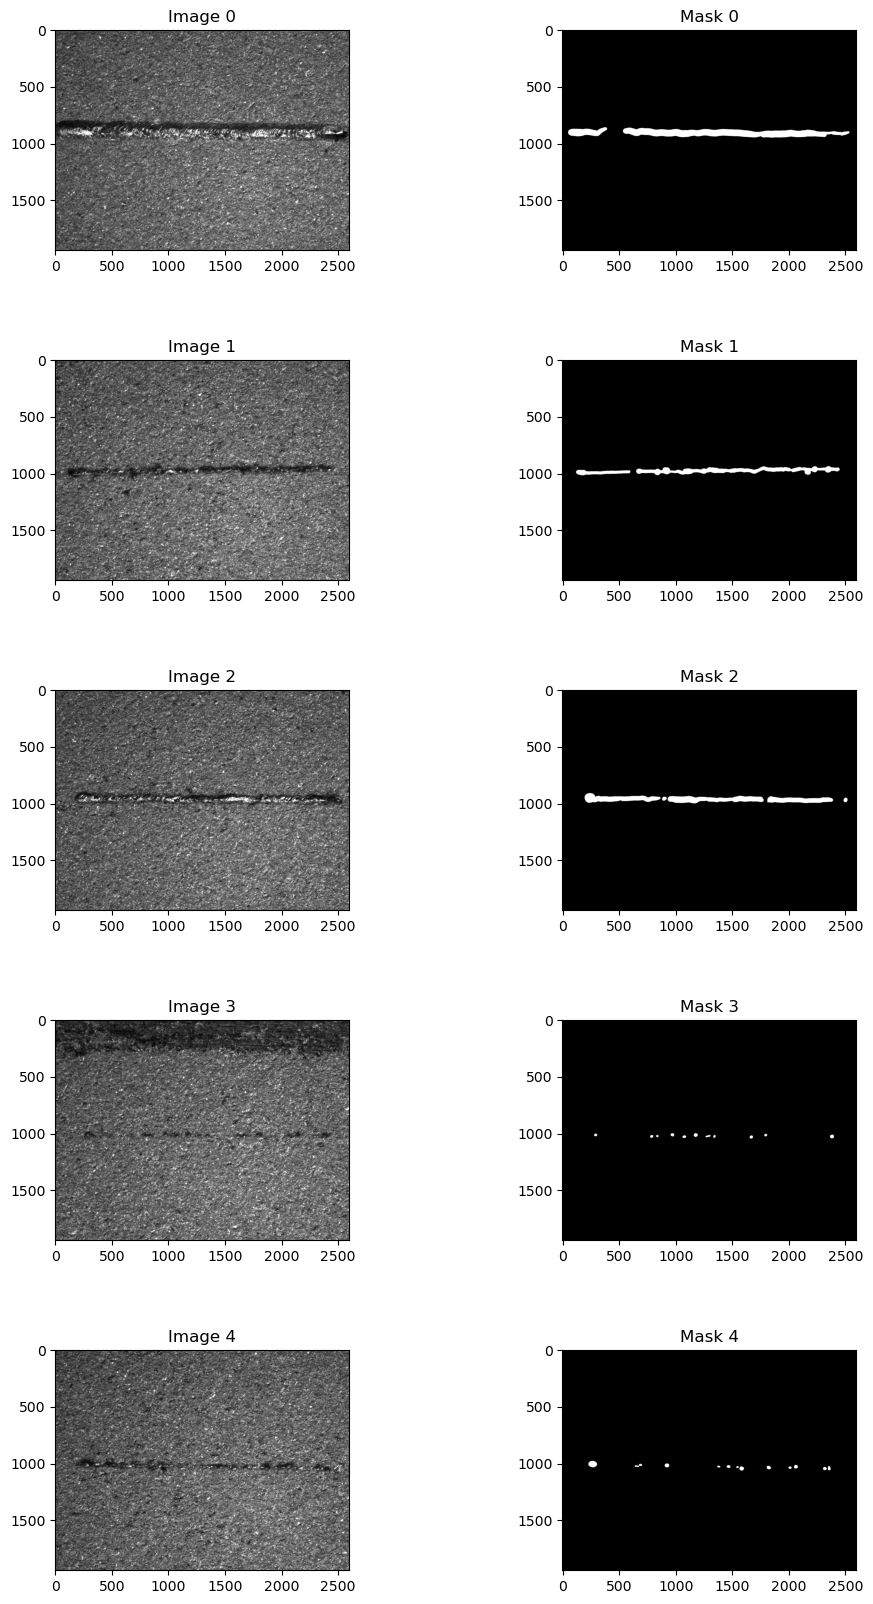

In [30]:
plot_images(images, masks, size=(12,20))

In [24]:
labels = np.array([measure.label(mask) for mask in masks])

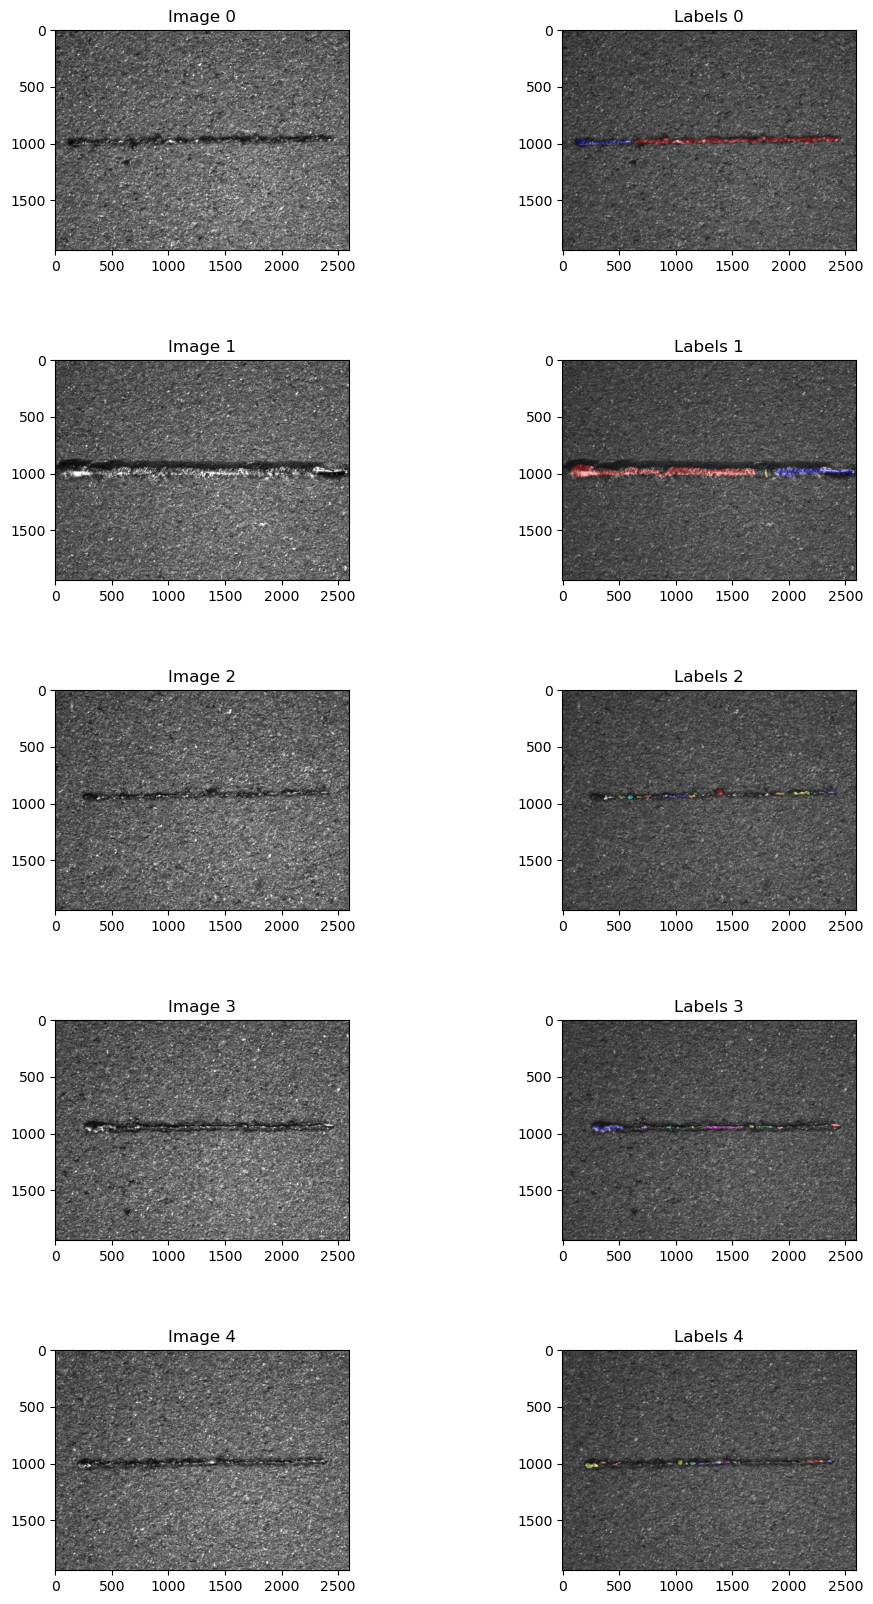

In [32]:
plot_labels(labels, images, size=(12,20))